In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

print(pd.__version__)
!python --version
print(sklearn.__version__) #1.6.1 em 23.09.2025
#atualizada em 20.09.2024:https://pandas.pydata.org/

2.2.3
Python 3.12.7
1.6.1


In [5]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys() #dict python

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### Entendendo o dataset

In [ ]:
#print(mnist.DESCR) # o dataset normalmente fica em cache em $HOME/scikit_learn_data. No caso no windows: C:\Users\<user>\scikit_learn_data

In [7]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)
#X é um dataframe pandas, y é uma serie pandas

(70000, 784)
(70000,)


class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


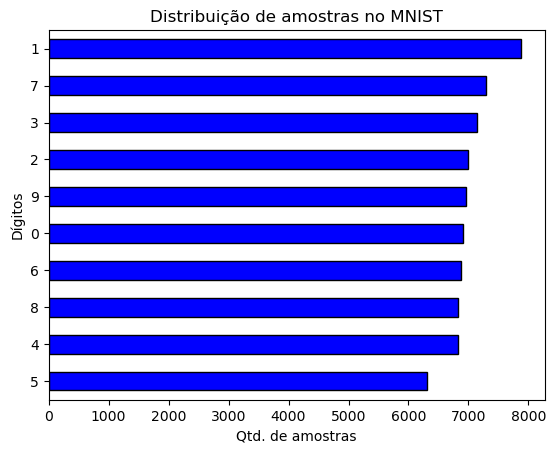

In [12]:
print(y.value_counts()) # para ver quantas amostras o dataset possui por classe
y_freq = y.value_counts()
y_freq.plot(kind='barh', color="blue", edgecolor="black")

plt.xlabel("Qtd. de amostras")
plt.ylabel("Dígitos")
plt.title("Distribuição de amostras no MNIST")
plt.gca().invert_yaxis()  # opcional: inverte a ordem para maior valor no topo
plt.show()

(-0.5, 27.5, 27.5, -0.5)

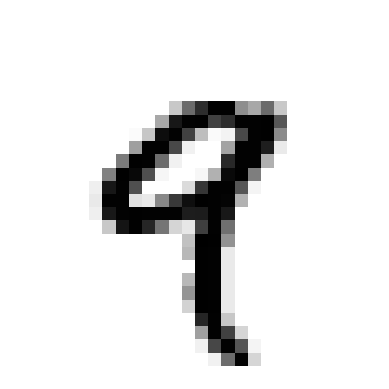

In [15]:
some_digit = X.loc[4,:] #X[0] 
# converter de serie pandas para numpy (na verdade já vê a serie como um array)
some_digit_np = some_digit.to_numpy()
some_digit_image = some_digit_np.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [16]:
y[4] #verifica se y[0] é o dígito 5 mesmo

'9'

In [17]:
import numpy as np
# como o label é uma string, vamos converter para número, pois os algoritmos ML trabalham com números
y = y.astype(np.uint8) # unsigned int de 1 byte, o famoso unsigned char do C

In [18]:
# o dataset MNIST já é separado em conjunto de treino e teste, onde o conjunto de treino está embaralhado (shuffle),
# o que é bom neste caso

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

class
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


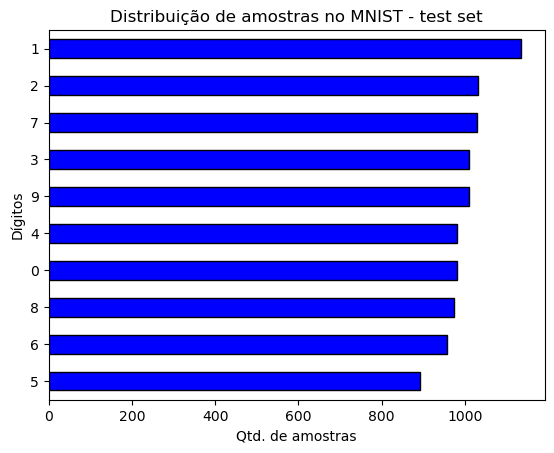

In [19]:
print(y_test.value_counts())
y_freq = y_test.value_counts()
y_freq.plot(kind='barh', color="blue", edgecolor="black")

plt.xlabel("Qtd. de amostras")
plt.ylabel("Dígitos")
plt.title("Distribuição de amostras no MNIST - test set")
plt.gca().invert_yaxis()  # opcional: inverte a ordem para maior valor no topo
plt.show()

### Para classificadores binários, vale a pena verificar necessidade de balanceamento e de calibração: https://scikit-learn.org/stable/modules/calibration.html

### Classificação MULTICLASSE OU MULTINOMIAIS (distinguem mais de 2 classes). Estão presentes por exemplo no problema de detecção de objetos com aprendizagem profunda, onde na mesma imagem tem-se objetos de classes distintas (ex. pessoa, carro, semáforo, bicicleta etc.)  e é necessário predizer os rótulos das classes dos objetos presentes. Na outra etapa deve-se também predizer os retângulos demarcadores de cada objeto (bounding box), ou seja, suas 4 coordenadas e consequente localização. Neste caso é um problema de regressão
<img src='img/exemplo_detect.png'>

#### Embora algoritmos como SGD (gradiente descendente estocástico), RandomForest (florestas aleatórias), Naive Bayes entre outros lidem com multiclasse nativamente, outros são estritamente binários, como regressão logística, SVM, Perceptron etc. mas existem técnicas para usar os modelos binários em problemas multiclasse.<br> 
- A primeira técnica é a OvR (one versus-the-rest, ou One-vs-All ou OvA). No caso do MNIST com 10 classes, é uma heurística que usa um classificador binário para cada dígito (detector 0, detector 1, detector 2 etc.). Obtém-se o score de decisão (ou probabilidade) de cada classificador binário e o maior score (argmax) é a classe predita. Cada detector usa a base toda (positiva: interesse, negativa: o resto). Pode ser um problema em datasets com muitas linhas, muitas classes, modelos lentos. Em modelos como Perceptron e Regressão Logística que retornam probabilidades ou scores é bem intuitivo. Antes de vermos o exemplo do MNIST, vamos ver um exemplo didático do seu uso:


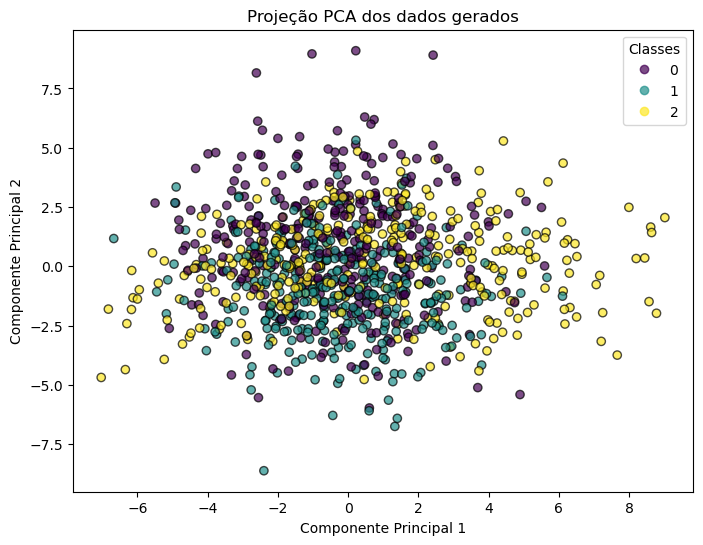

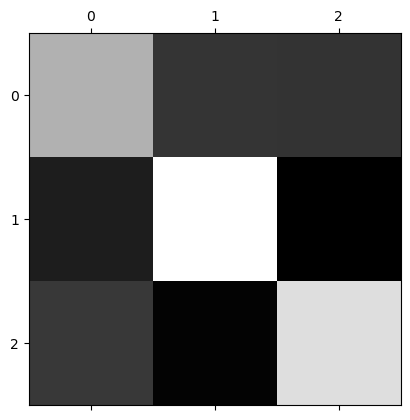

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       332
           1       0.74      0.80      0.77       335
           2       0.72      0.71      0.71       333

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



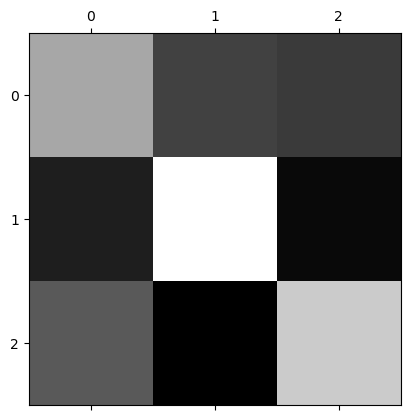

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       332
           1       0.69      0.74      0.71       335
           2       0.64      0.61      0.62       333

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



In [39]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_classes=3, random_state=42)

# Redução de dimensionalidade para 2D para PLOTAR
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotar as classes no plano PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7, edgecolor="k")

# Legenda com as classes
plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Projeção PCA dos dados gerados")
plt.show()

#modelo binário sendo usado em multiclass
model_lr = LogisticRegression(penalty='l1', solver='saga') #a versão com o hiper parâmetro multi_class=ovr está desatualizada
ovr = OneVsRestClassifier(model_lr)
ovr.fit(X, y)
yhat = ovr.predict(X)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_mx = confusion_matrix(y, yhat)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

print(classification_report(y,yhat))

from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier()
# Se usar o SGDClassifier, não roda OvR ou OvO, pode usar direto pois lida com multiclasse
model_sgd.fit(X, y)
yhat = model_sgd.predict(X)
conf_mx = confusion_matrix(y, yhat)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
print(classification_report(y,yhat))

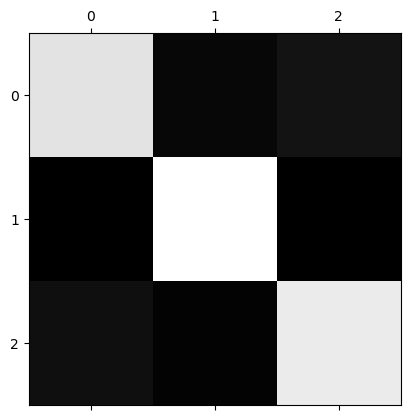

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       332
           1       0.93      0.97      0.95       335
           2       0.90      0.90      0.90       333

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [45]:
from sklearn.svm import SVC 
svm_ovr_model = OneVsRestClassifier(SVC(kernel='poly')) 
svm_ovr_model.fit(X, y) #todo o conjunto
yhat = svm_ovr_model.predict(X)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_mx = confusion_matrix(y, yhat)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

print(classification_report(y,yhat))



#### Retomando os conjuntos de treino e teste do MNIST com SVM

In [46]:
from sklearn.svm import SVC 
svm_ovr_model = OneVsRestClassifier(SVC()) 
svm_ovr_model.fit(X_train, y_train) #todo o conjunto (ATENÇÃO: treino demorado, onde cada modelo usa X_train completo)
svm_ovr_model.predict([some_digit]) #lembremos que é o 9 (testar outros)

print(len(svm_ovr_model.estimators_))

10


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\josen\anaconda3\envs\

#### Agora com SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier()
# Se usar o SGDClassifier, não roda OvR ou OvO, pode usar direto pois lida com multiclasse
#model_sgd.fit(X_train, y_train) #todo o conjunto (ATENÇÃO: treino demorado, onde cada modelo usa X_train completo)
model_sgd.predict([some_digit])
scores = model_sgd.decision_function([some_digit]) #irá mostrar o score de cada classe. O maior é a classe identificada pelo modelo
print(np.argmax(scores))

#### Testar código abaixo

In [ ]:
# avaliando sem padronização
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_sgd, X_train, y_train, scoring='precision', cv=3, n_jobs=-1)

#### E comparar com este

In [ ]:
# avaliando com padronização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
scores = cross_val_score(model_sgd, X_train_scaled, y_train, scoring='precision', cv=3, n_jobs=-1)

#### Já o OvO (One-versus-One) são classificadores binários aos pares (distinguir 0 e 2, 1 e 2 etc.), sendo necessário N x (N-1)/2 classificadores. No caso do MNIST são 45 classificadores. A vantagem é ser mais rápido, pois cada um só precisa ser treinado em seu subconjunto.<br>

https://scikit-learn.org/stable/modules/multiclass.html

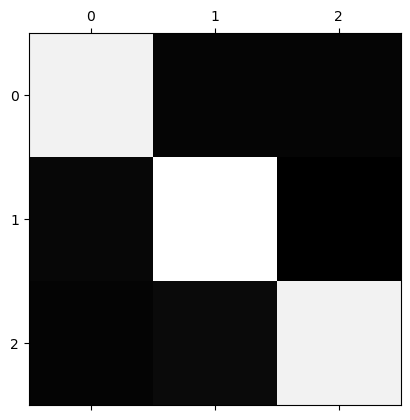

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       328
           1       0.91      0.94      0.93       339
           2       0.95      0.91      0.93       333

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [47]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_classes=3, random_state=1)
# define model
model = SVC(decision_function_shape='ovo') #SVC já usa OVO, poderia ser só SVC()
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_mx = confusion_matrix(y, yhat)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

print(classification_report(y,yhat))

#### Testando um SVM (OvO) no MNIST

In [48]:
#from sklearn.multiclass import One
from sklearn.svm import SVC #SUPPORT VECTOR MACHINE - MÁQUINA DE VETOR DE SUPORTE
svm_model = SVC() #usa OvO
svm_model.fit(X_train, y_train) #45 classificadores
svm_model.predict([some_digit])


c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([9], dtype=uint8)

In [24]:
some_digit_scores = svm_model.decision_function([some_digit])
some_digit_scores #10 scores por instância

c:\Users\josen\anaconda3\envs\tadsml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

### Obtendo o índice do maior score

In [25]:
np.argmax(some_digit_scores)

5

In [26]:
svm_model.classes_ #coincidiu com a classe 5!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Retomando o MNIST, com validação cruzada e predição no conjunto de validação para construir matriz de confusão e comparar modelos

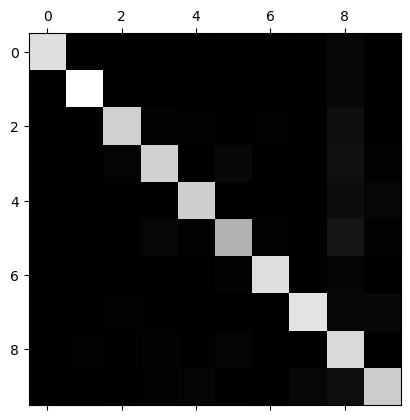

In [ ]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model_sgd, X_train_scaled, y_train, cv=3, n_jobs=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

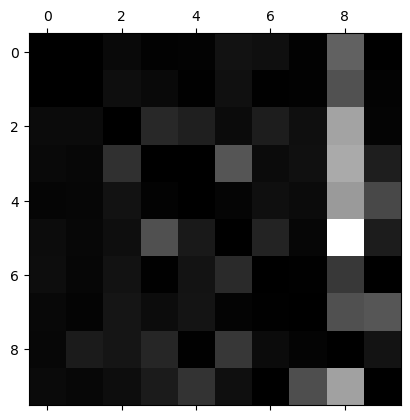

In [45]:
# parece haver confusão do 3 com o 5
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums # dividir cada valor na matriz pelo número de imagens na classe correspondente (ERRO)

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

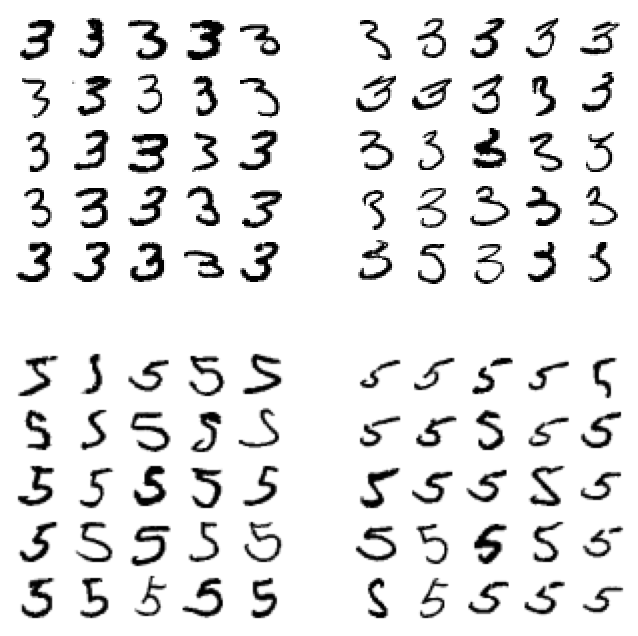

In [48]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# 5x5 à esquerda algarismos classificados como 3 e à direita como 5
# Os erros se devem ao SGD simples, linear, os 3s e 5s diferem só em alguns pixels

# classificador sensível à mudança e à rotação da imagem. Pode-se corrigir para que estejam bem centralizadas, sem muita rotação

#### E por último classificação multirótulo e multioutput (mais de 2 rótulos). Para multirótulo, suponha que queremos gerar a saída de várias classes para cada instância, por exemplo, queremos reconhecer três rostos em uma foto: Pedro, Maria, João. Uma foto com Pedro e João teria como saída [1,0,1]. Neste caso, cada classe é binária, é Pedro ou não é Pedro. Na classificação multioutput esta é uma generalização da multirótulo, e cada rótulo pode ser multi classeado

In [9]:
# Vamos classificar imagens de dígitos maiores ou iguais a 7 e que sejam ímpares
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1) #impar
y_multilabel = np.c_[y_train_large, y_train_odd]

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_multilabel)

model_knn.predict([some_digit])

c:\Users\josen\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [14]:
# Avaliar métrica do classificador. Pode ser qualquer métrica, vamos usar o F1 score por classe
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(model_knn, X_train, y_multilabel, cv=3, n_jobs=-1)

from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average='macro') # ou average='weighted' se as classes são desbalanceadas e ele usa o conjunto suporte para ponderar

0.976410265560605